In [141]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pickle

In [142]:
df=pd.read_csv("datasets/city_temperature.csv")


/var/folders/wc/t6vtkdwd6pz70hz9fbn2zc7r0000gn/T/ipykernel_57342/2548227251.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("datasets/city_temperature.csv")


In [143]:
df.shape

(2906327, 8)

In [144]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [145]:
df=df.drop_duplicates()

In [146]:
df.isna().sum()

Region                  0
Country                 0
State             1448805
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [147]:
df=df.fillna("Not Specified")

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2885612 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 198.1+ MB


In [149]:
df =df[ (df['Year'] != 200) & (df['Year'] != 201) & (df['Day'] != 0) ]

In [150]:
#df["AvgTemperatureCelsius"]=(df["AvgTemperature"]-32)*(5/9)
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])

In [151]:
df =df[(df['AvgTemperature'] >= -58) & (df['Year'] < 2020)]

/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seabo

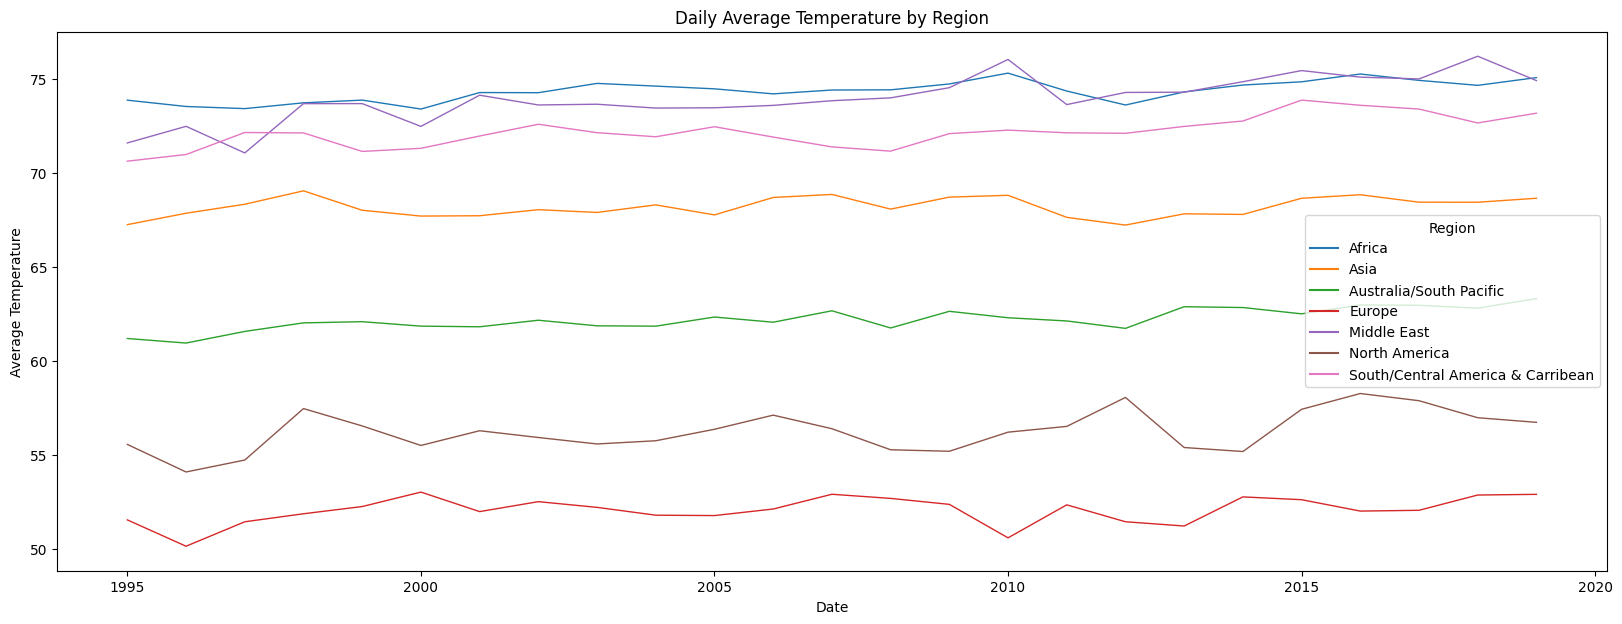

In [155]:
region = df[['Region', 'Year', 'AvgTemperature']].groupby(['Region', 'Year']).mean()
plt.figure(figsize=(20,7))
sns.lineplot(x = 'Year', y = 'AvgTemperature', hue = 'Region', units = 'Region', markers = True, dashes = False, estimator = None, lw = 1, data = region)
plt.title("Daily Average Temperature by Region")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

In [158]:
df[df["City"] == "New York City"]

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
2291563,North America,US,New York,New York City,1,1,1995,44.0,1995-01-01
2291564,North America,US,New York,New York City,1,2,1995,41.8,1995-01-02
2291565,North America,US,New York,New York City,1,3,1995,28.1,1995-01-03
2291566,North America,US,New York,New York City,1,4,1995,31.7,1995-01-04
2291567,North America,US,New York,New York City,1,5,1995,21.3,1995-01-05
...,...,...,...,...,...,...,...,...,...
2300689,North America,US,New York,New York City,12,27,2019,48.3,2019-12-27
2300690,North America,US,New York,New York City,12,28,2019,48.6,2019-12-28
2300691,North America,US,New York,New York City,12,29,2019,42.2,2019-12-29
2300692,North America,US,New York,New York City,12,30,2019,40.8,2019-12-30


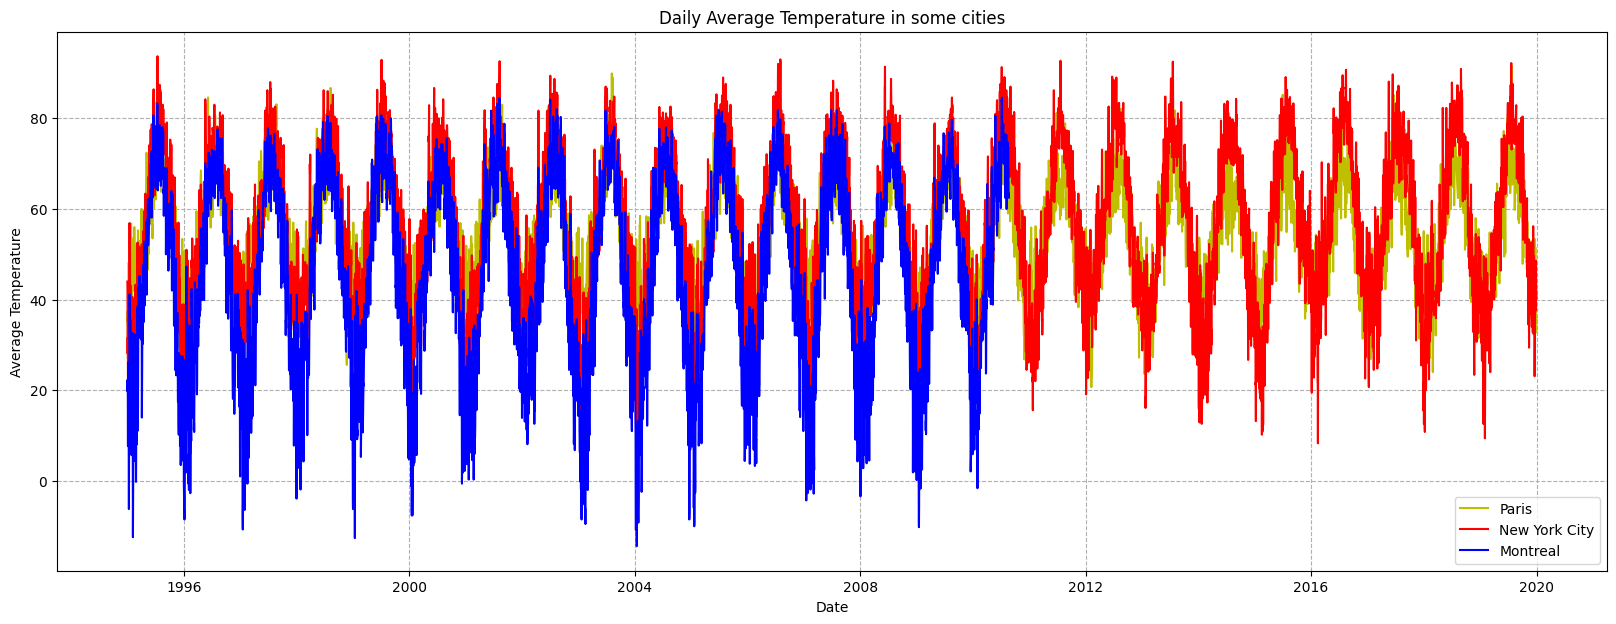

In [159]:
plt.figure(figsize = (20,7))
plt.plot(df['Date'][(df['City'] =="Paris")], df['AvgTemperature'][(df['City'] =="Paris")], 'y' ,label = 'Madrid')
plt.plot(df['Date'][(df['City'] =="New York City")], df['AvgTemperature'][(df['City'] =="New York City")], 'r' ,label = 'Moscow')
plt.plot(df['Date'][(df['City'] =="Montreal")], df['AvgTemperature'][(df['City'] =="Montreal")], 'b' ,label = 'Ottawa')
plt.grid(linestyle = '--')
plt.legend(["Paris","New York City","Montreal"])
plt.title("Daily Average Temperature in some cities")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seabo

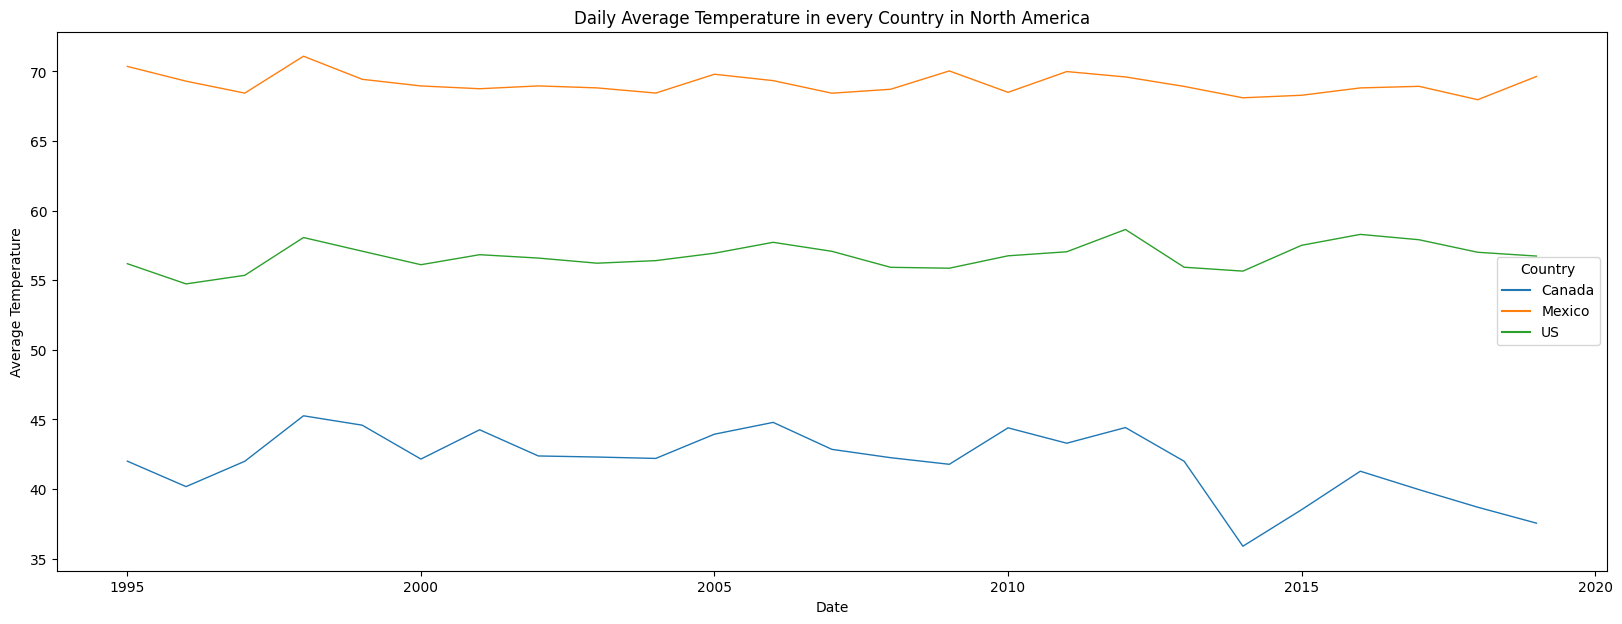

In [160]:
country1=df[["Country","Region","Year","AvgTemperature"]]
country2=country1[(country1['Region'] == "North America") ]
country=country2.drop("Region",axis=1).groupby(['Country', 'Year']).mean()
plt.figure(figsize=(20,7))
sns.lineplot(x = 'Year', y = 'AvgTemperature', hue = 'Country', units = 'Country', markers = True, dashes = False, estimator = None, lw = 1, data = country)
plt.title("Daily Average Temperature in every Country in North America")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cyril/Documents/Personal/WebDev/weather-forecast/venv/lib/python3.9/site-packages/seabo

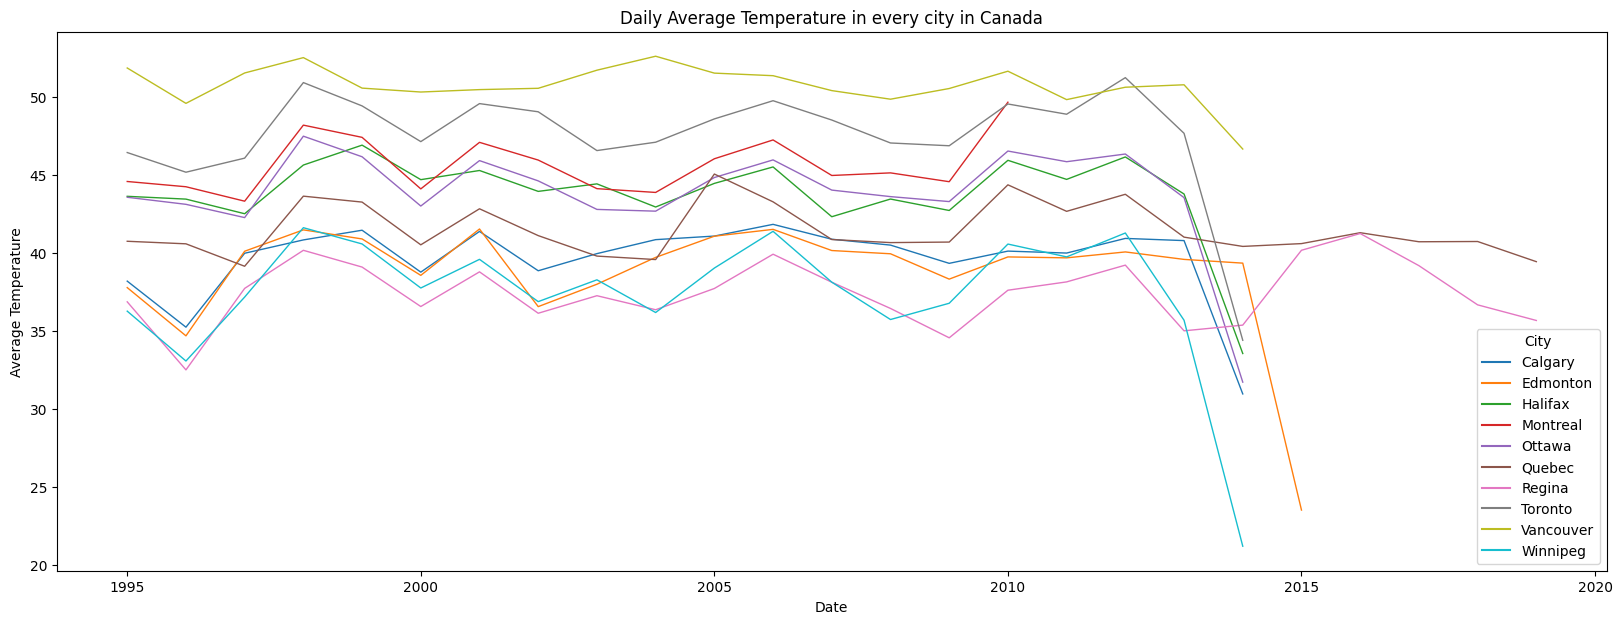

In [161]:
city1=df[["Country","City","Year","AvgTemperature"]]
city2=city1[(city1['Country'] == "Canada") ]
city=city2.drop("Country",axis=1).groupby(['City', 'Year']).mean()
plt.figure(figsize=(20,7))
sns.lineplot(x = 'Year', y = 'AvgTemperature', hue = 'City', units = 'City', markers = True, dashes = False, estimator = None, lw = 1, data = city)
plt.title("Daily Average Temperature in every city in Canada")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

In [162]:
le=LabelEncoder()

In [84]:
df["Region"]=le.fit_transform(df["Region"])
region = dict(zip(le.classes_, range(len(le.classes_))))
df["Country"]=le.fit_transform(df["Country"])
country = dict(zip(le.classes_, range(len(le.classes_))))
df["State"]=le.fit_transform(df["State"])
state = dict(zip(le.classes_, range(len(le.classes_))))
df["City"]=le.fit_transform(df["City"])
city = dict(zip(le.classes_, range(len(le.classes_))))

In [163]:
df["CityEncoded"]=le.fit_transform(df["City"])

def mapping_city(x):
    return {"city": x["City"], "value": x["CityEncoded"]}

df["MappingCity"] = df.apply(mapping_city, axis=1)

In [168]:
df = df.drop_duplicates(subset="City")

In [169]:
df.set_index("City", inplace=True)

def mapping(x):
    return [x["Region"], x["Country"], x["State"]]

df["Mapping"] = df.apply(mapping, axis=1)

/var/folders/wc/t6vtkdwd6pz70hz9fbn2zc7r0000gn/T/ipykernel_57342/4293398410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mapping"] = df.apply(mapping, axis=1)


In [87]:
df=df.sort_values(by="Date")

In [88]:
df.shape[0] * 0.9

2491105.5

In [89]:
split=math.ceil(df.shape[0] * 0.9)
train=df[:split]
test=df[split:]

In [90]:
X_train=train.drop(["AvgTemperature","Date"],axis=1).to_numpy()
y_train=train["AvgTemperature"].to_numpy()
X_test=test.drop(["AvgTemperature","Date"],axis=1).to_numpy()
y_test=test["AvgTemperature"].to_numpy()

In [91]:
print("X_train shape:"+str(X_train.shape) +
      "\ny_train shape:"+str(y_train.shape) +
      "\nX_test shape:"+str(X_test.shape) +
      "\ny_test shape:"+str(y_test.shape)
    )

X_train shape:(2491106, 7)
y_train shape:(2491106,)
X_test shape:(276789, 7)
y_test shape:(276789,)


In [92]:
xgbr=xgb.XGBRegressor(booster="dart",objective="reg:squarederror",n_estimators=151)

In [93]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=151, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [94]:
xgbrPredic=xgbr.predict(X_test)

In [95]:
print("Root Mean Squared Error (RMSE) score XGBoost:"+str(np.sqrt(mean_squared_error(y_test,xgbrPredic))))

Root Mean Squared Error (RMSE) score XGBoost:7.008817158316208


In [96]:
test["prediction"]=xgbrPredic

/var/folders/wc/t6vtkdwd6pz70hz9fbn2zc7r0000gn/T/ipykernel_57342/3106529746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediction"]=xgbrPredic


In [97]:
df=df.merge(test[["prediction"]],how="left",left_index=True,right_index=True)

In [98]:
df=df.set_index("Date")

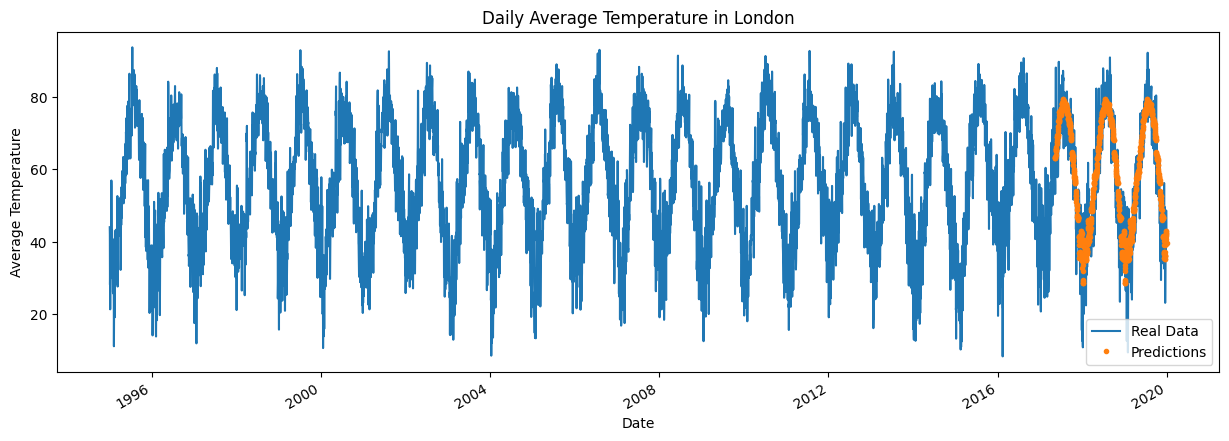

In [99]:
ax=df['AvgTemperature'][(df['City'] ==city["New York City"])].plot(figsize=(15,5))
df["prediction"][(df['City'] ==city["New York City"])].plot(ax=ax,style=".")
plt.legend(["Real Data","Predictions"])
ax.set_title("Daily Average Temperature in NYC")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

In [122]:
file_name = 'xgbr_model.pkl'

pickle.dump(xgbr, open(file_name, "wb"))

In [123]:
xgbr_loaded = pickle.load(open(file_name, "rb"))

In [136]:
def mapping(x):
    return [x["Region"], x["Country"], x["State"]]

In [137]:
df["Mapping"] = df.apply(mapping, axis=1)

In [138]:
df

,Region,Country,State,Month,Day,Year,AvgTemperature,prediction,Mapping
City,,,,,,,,,
7,0,1,36,1,1,1995,64.2,NaN,"[0, 1, 36]"
123,5,114,23,1,1,1995,31.1,NaN,"[5, 114, 23]"
113,5,114,23,1,1,1995,31.3,NaN,"[5, 114, 23]"
96,5,114,23,1,1,1995,34.1,NaN,"[5, 114, 23]"
46,5,114,22,1,1,1995,38.5,NaN,"[5, 114, 22]"
...,...,...,...,...,...,...,...,...,...
319,3,24,36,2,1,1996,22.5,NaN,"[3, 24, 36]"
120,6,43,36,4,30,1996,85.1,NaN,"[6, 43, 36]"
291,3,0,36,4,21,1997,55.4,NaN,"[3, 0, 36]"
